In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Load data



In [11]:
%%R -o mtcars

require(tidyverse)
mtcars %>% head()

                   mpg cyl disp  hp drat    wt  qsec vs am gear carb
Mazda RX4         21.0   6  160 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag     21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
Datsun 710        22.8   4  108  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive    21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2
Valiant           18.1   6  225 105 2.76 3.460 20.22  1  0    3    1


In [12]:
# now mtcars is available in python too
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
Mazda RX4 Wag,21.0,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
Datsun 710,22.8,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
Hornet 4 Drive,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
Hornet Sportabout,18.7,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0


# Exploratory Data Analysis

In [24]:
# correlation matrix of mtcars
mtcars.corr().round(1)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0,-0.9,-0.8,-0.8,0.7,-0.9,0.4,0.7,0.6,0.5,-0.6
cyl,-0.9,1.0,0.9,0.8,-0.7,0.8,-0.6,-0.8,-0.5,-0.5,0.5
disp,-0.8,0.9,1.0,0.8,-0.7,0.9,-0.4,-0.7,-0.6,-0.6,0.4
hp,-0.8,0.8,0.8,1.0,-0.4,0.7,-0.7,-0.7,-0.2,-0.1,0.7
drat,0.7,-0.7,-0.7,-0.4,1.0,-0.7,0.1,0.4,0.7,0.7,-0.1
wt,-0.9,0.8,0.9,0.7,-0.7,1.0,-0.2,-0.6,-0.7,-0.6,0.4
qsec,0.4,-0.6,-0.4,-0.7,0.1,-0.2,1.0,0.7,-0.2,-0.2,-0.7
vs,0.7,-0.8,-0.7,-0.7,0.4,-0.6,0.7,1.0,0.2,0.2,-0.6
am,0.6,-0.5,-0.6,-0.2,0.7,-0.7,-0.2,0.2,1.0,0.8,0.1
gear,0.5,-0.5,-0.6,-0.1,0.7,-0.6,-0.2,0.2,0.8,1.0,0.3


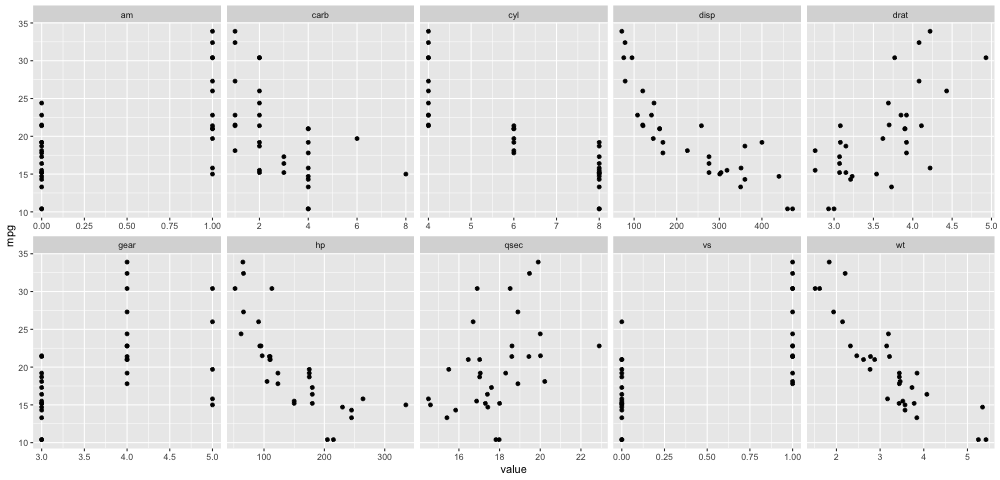

In [25]:
%%R -w 1000

# some plots with fuel efficiency as the dependent variable
# you can modify or copy/paste this as needed if you want to observe relationships in these variables visually

mtcars_long <- mtcars %>% 
    pivot_longer(-mpg, names_to='variable', values_to='value')

ggplot(mtcars_long, aes(x=value, y=mpg)) +
    geom_point() +
    facet_wrap(~variable, scales='free_x',nrow=2) 


In [ ]:
# Empty cells below for any additional exploratory data viz you'd like to do.

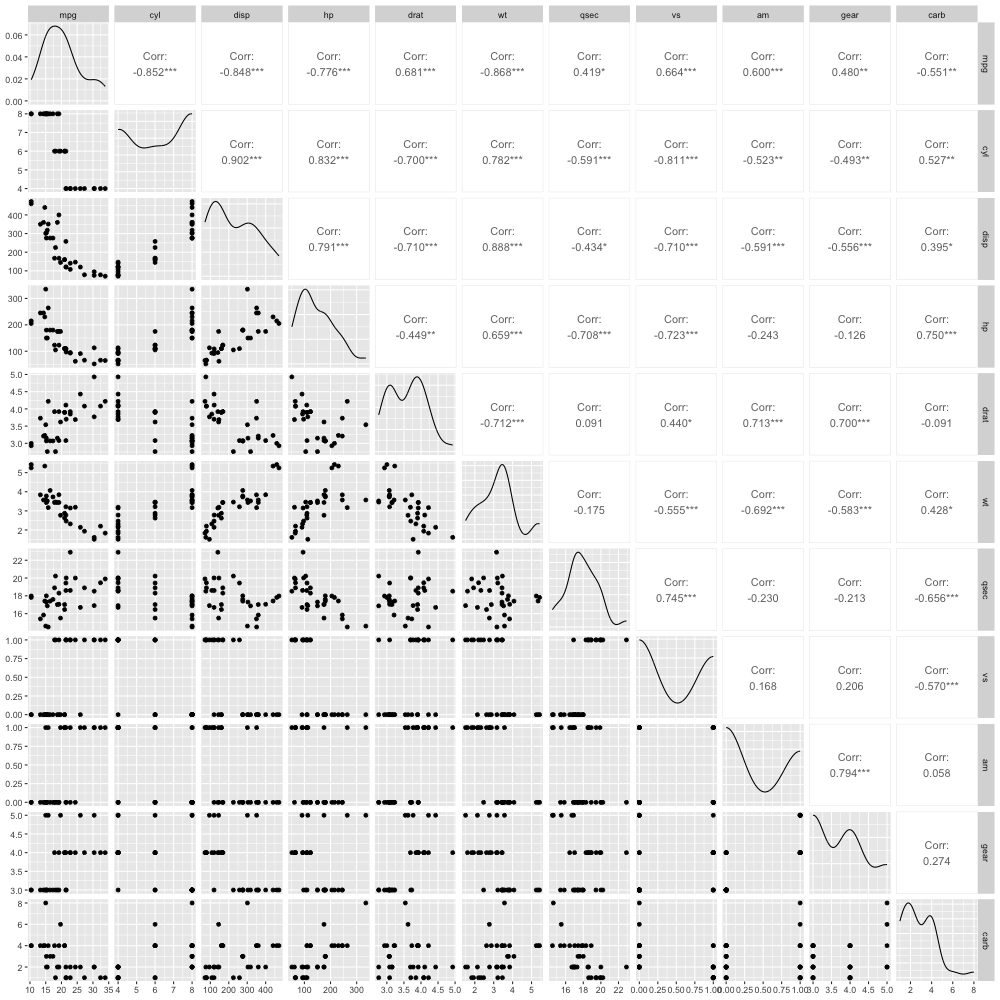

In [26]:
%%R -w 1000 -h 1000

library("GGally")

# Sometimes it's nice to make a pairplot to quickly see relationships between variables
ggpairs(mtcars)

# Regression models

In [27]:
%%R 
# Here is a cell with a linear regression on mtcars to get you started
# mpg ~ wt + disp
# modify the formula and paste in subsequent cells to run different models
# you can use forward selection, backwards selection, or your own approach

model <- lm("mpg ~ wt + disp", data=mtcars)
summary(model)


Call:
lm(formula = "mpg ~ wt + disp", data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4087 -2.3243 -0.7683  1.7721  6.3484 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.96055    2.16454  16.151 4.91e-16 ***
wt          -3.35082    1.16413  -2.878  0.00743 ** 
disp        -0.01773    0.00919  -1.929  0.06362 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.917 on 29 degrees of freedom
Multiple R-squared:  0.7809,	Adjusted R-squared:  0.7658 
F-statistic: 51.69 on 2 and 29 DF,  p-value: 2.744e-10



👉 In the cells below, use either forward or backward selection to identify a model that fits this data and best explains the differences in a car's fuel efficiency. You can try various different models, see how they perform.

Remember, these aren't just abstract numbers in a vacuum. They are real data about real cars. Each variable has a meaning. Before just dropping it in your regression, as yourself what it means to explain the variance in `mpg` using that variable. Does that **methodological choice** make sense? 

Paste the model that you think best explains the variance in fuel efficiency below 👉

# Next steps

Woohoo! We totally understand how engineers in the 1970s designed cars right? Our regressions answered all of our questions? Time to write an article?

...As you can probably tell, we're not quite there yet.

This analysis may have answered some questions that you had but raised others.

What have you learned about each of the following variables and their impact on fuel efficiency?

- cyl (Number of Cylinders)
- disp (Displacement cu.in.)
- hp (Gross horsepower)
- drat (Rear axle ratio)
- wt (Weight)
- qsec (1/4 mile time)
- vs (Engine type - V-shape or Straight)
- am (Transmission Type - Autmoatic or Manaul)
- gear (Number of gears in the transmission)
- carb (Number of carburetor barrels)

Game out what your next steps would be. If you have the opportunity to speak to a car expert (hint: you will!) and the opportunity to speak to a stats expert (hint: you will!) what would you ask them?


## Reporting

Car design has evolved significantly since this dataset was published. Your goal is to understand what made a car fuel efficient (or not) in the 1970s/80s. What were the tradeoffs that a car maker had to make? How did those tradeoffs impact fuel effienceny? How are these variables all related to one another?

# What are 3-5 questions you have for a domain expert?
- 
- 
-

# What are 3-5 questions you have for a statistician?
- 
- 
-